In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
swg = pd.read_csv('swiggy.csv')

In [3]:
swg.head(5)

,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [5]:
swg.shape

(8680, 10)

In [6]:
swg.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            4
Avg_ratings      0
Total_ratings    0
Food_type        0
Address          0
Delivery_time    0
dtype: int64

In [7]:
avg_price = np.mean(swg['Price'])
avg_price

348.4564315352697

In [8]:
# Replacing null values with mean price
swg['Price'].fillna(avg_price, inplace=True)
swg.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg_ratings      0
Total_ratings    0
Food_type        0
Address          0
Delivery_time    0
dtype: int64

In [9]:
swg.describe()

,ID,Price,Avg_ratings,Total_ratings,Delivery_time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.456432,3.655104,156.634793,53.967051
std,158671.617188,230.936140,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [10]:
swg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg_ratings    8680 non-null   float64
 6   Total_ratings  8680 non-null   int64  
 7   Food_type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery_time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [11]:
# How many cities are there in the dataset
swg['City'].nunique()

9

In [12]:
# How many restaurants are there in the dataset
swg.Restaurant.nunique()

7865

In [13]:
# For each city, how many orders have been made
city_count = swg['City'].value_counts()
print(city_count)

City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64


In [14]:
# Top 10 restaurants having heighest ratings
swg.groupby('Restaurant')['Avg_ratings'].mean().sort_values(ascending = False).head(10)

Restaurant
Diamond Market Pizza Jp                 5.0
Get In My Belly                         5.0
Splurge - Thickshakes And Milkshakes    5.0
Snaxx                                   5.0
Nivala Apka Apna                        5.0
The Asian Pavilion                      5.0
Shree Krishna Juice Bar                 5.0
Tricky Shakes                           5.0
The Liege Waffles                       5.0
Wallonia Waffle Co.                     5.0
Name: Avg_ratings, dtype: float64

In [15]:
# Bottom 10 restaurants having lowest ratings
swg.groupby('Restaurant')['Avg_ratings'].mean().sort_values().head(10)

Restaurant
Golden Dragon Chinese & Momo    2.0
Hyderabadi Biryani House        2.2
Frosty Den                      2.2
The Shawarma Daddy              2.2
Diwan Food Court                2.3
Cia Chinese In Ahmedabad        2.4
Urban Foods Ambawadi            2.6
Down Town House                 2.6
Bangaliyana Ranna Ghar          2.7
Anupama Cloud Kitchen           2.7
Name: Avg_ratings, dtype: float64

### Visual Analytics

In [16]:
# Most ordered top 10 food types
food_order = swg['Food_type'].value_counts().head(10)
food_order

Food_type
Indian                  389
Chinese                 277
North Indian            246
Fast Food               240
South Indian            228
Indian,Chinese          106
Desserts                106
North Indian,Chinese     99
Bakery                   90
Beverages                82
Name: count, dtype: int64

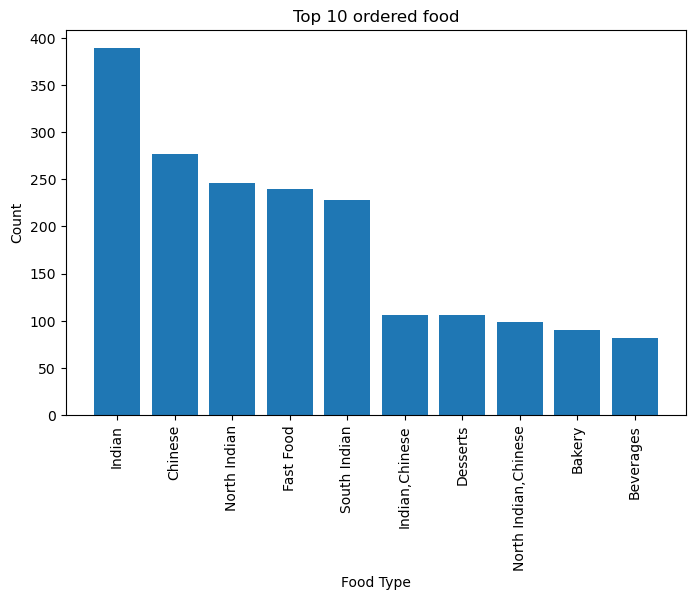

In [17]:
#Bar graph
fig = plt.figure(figsize = (8,5))
plt.bar(food_order.index, food_order.values)
plt.xlabel("Food Type")
plt.ylabel("Count")
plt.title("Top 10 ordered food")
plt.xticks(rotation = 'vertical') # To change orientation of x axis label
plt.show()

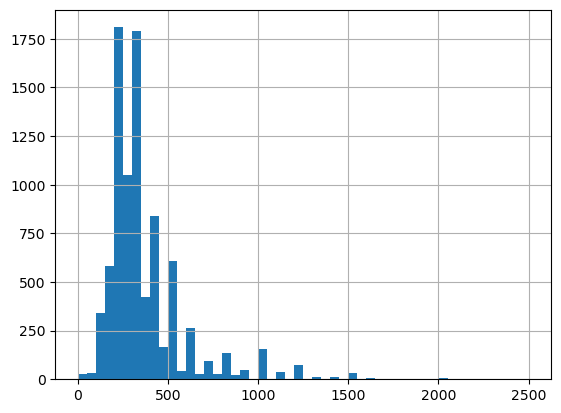

In [18]:
# Histogram to find price bracket of foods
swg['Price'].hist(bins=50)
plt.show()

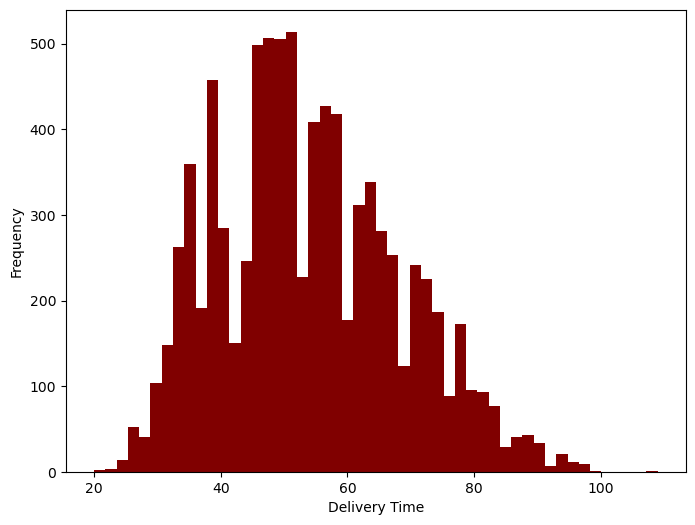

In [19]:
# Histogram for food delivery
fig = plt.figure(figsize=(8,6))
plt.hist(swg.Delivery_time, bins = 50, color = 'maroon')
plt.xlabel("Delivery Time")
plt.ylabel("Frequency")
plt.show()

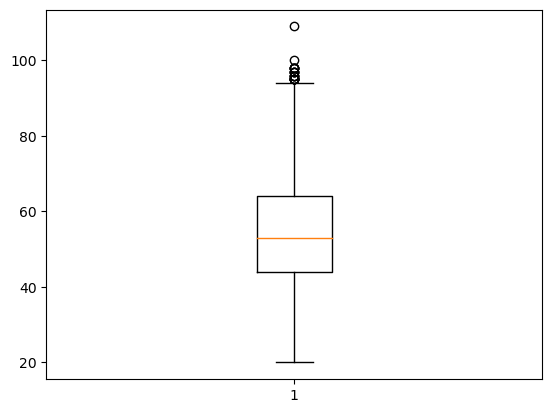

In [20]:
plt.boxplot(swg['Delivery_time'])
plt.show()

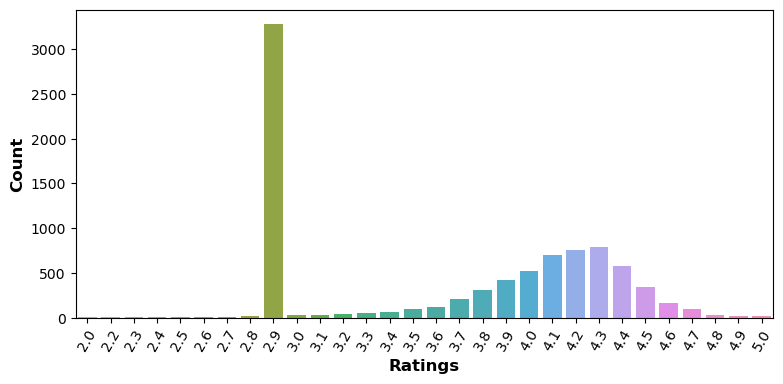

In [21]:
plt.figure(figsize=(9,4))
sns.countplot(data=swg, x = 'Avg_ratings')
plt.xticks(rotation = 60)
plt.xlabel('Ratings', weight = 'bold', fontsize = 12)
plt.ylabel("Count", weight = 'bold', fontsize = 12)
plt.show()

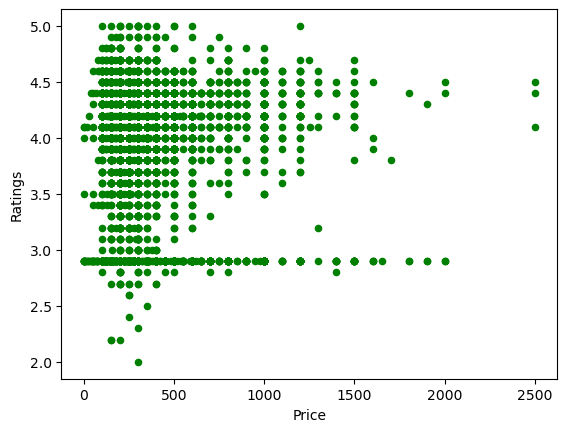

In [22]:
#Scatter plot between Price and Ratings
swg.plot(kind = 'scatter', x = 'Price', y = 'Avg_ratings', color = 'green')
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

The above graph shows that higher price does not gaurantee better ratings

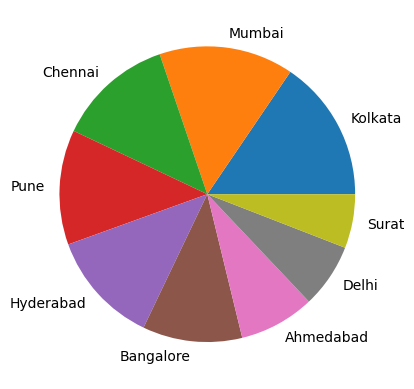

In [23]:
city_count = swg['City'].value_counts()
city_names = city_count.index
plt.pie(city_count.values, labels=city_names)
plt.show()